In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_housing = pd.read_csv('housing.csv')
df_housing.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY

In [3]:
df_housing.shape

(20640, 10)

In [36]:
df_housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [4]:
from sklearn.model_selection import train_test_split

df_housing_train = df_housing[:18000]
df_housing_test = df_housing[18000:]

In [38]:
total_bedrooms_median = df_housing_train['total_bedrooms'].median()
df_housing_train['total_bedrooms'] = df_housing_train['total_bedrooms'].fillna(total_bedrooms_median)
df_housing_test['total_bedrooms'] = df_housing_test['total_bedrooms'].fillna(total_bedrooms_median)

C:\ProgramData\Miniconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\ProgramData\Miniconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


<AxesSubplot:xlabel='longitude', ylabel='latitude'>

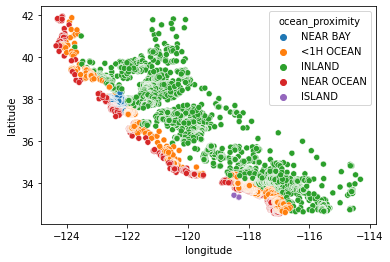

In [5]:
sns.scatterplot(y='latitude', x='longitude', data=df_housing_train, hue='ocean_proximity')

1. Island
2. Near ocean
3. <1h ocean
4. near bay
5. inland

In [6]:
# sns.scatterplot(x='housing_median_age', y='median_income', data=df_housing_train)

In [7]:
from sklearn.cluster import KMeans

ocean_proxi_encode = {
    'ISLAND': 1,
    'NEAR OCEAN': 2,
    '<1H OCEAN': 3,
    'NEAR BAY': 4,
    'INLAND': 5
}

X = df_housing_train[['longitude', 'latitude']]
X['ocean_proximity_encoded'] = df_housing_train['ocean_proximity'].apply(lambda x: ocean_proxi_encode[x]).copy()

k = 5
kmeans= KMeans(n_clusters=k)
y_pred = kmeans.fit_predict(X)

C:\ProgramData\Miniconda3\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


In [8]:
np.unique(y_pred)

array([0, 1, 2, 3, 4])

In [9]:
kmeans.cluster_centers_

array([[-118.02712008,   33.76874943,    2.81558118],
       [-122.28930447,   37.79690503,    3.39413408],
       [-121.36045455,   38.56997727,    5.        ],
       [-119.76127246,   36.21357036,    4.63922156],
       [-117.28544608,   34.06459314,    5.        ]])

In [10]:
kmeans.transform(X)

array([[5.99745185, 0.61440647, 1.4940475 , 3.04634332, 6.32502514],
       [5.97674001, 0.61307226, 1.49762683, 3.02732157, 6.30515152],
       [5.98396284, 0.61018319, 1.51392453, 3.03818966, 6.31481668],
       ...,
       [5.27545593, 0.72867957, 2.45428118, 2.9425707 , 6.01583707],
       [5.28291519, 0.72421532, 2.45674317, 2.95005031, 6.02361077],
       [5.28291519, 0.72421532, 2.45674317, 2.95005031, 6.02361077]])

In [11]:
pd.Series(y_pred)

0        1
1        1
2        1
3        1
4        1
        ..
17995    1
17996    1
17997    1
17998    1
17999    1
Length: 18000, dtype: int32

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

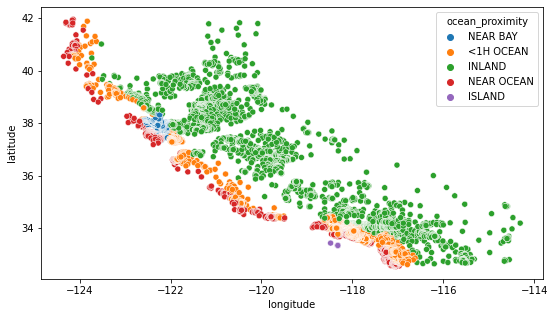

In [12]:
plt.figure(figsize=(9,5))
sns.scatterplot(y='latitude', x='longitude', data=df_housing_train, hue='ocean_proximity')

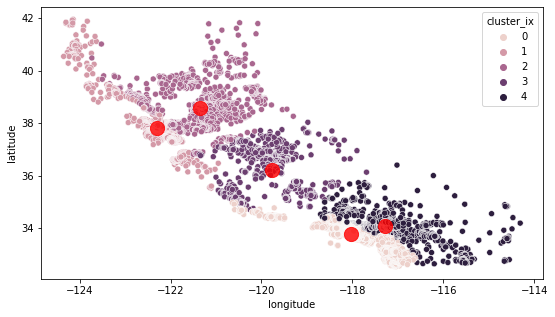

In [13]:
df_lat_long_cluster = pd.concat([X, pd.Series(y_pred)], axis=1).rename(columns={0: 'cluster_ix'})

plt.figure(figsize=(9,5))
centers = kmeans.cluster_centers_
sns.scatterplot( x='longitude', y='latitude', data=df_lat_long_cluster, hue='cluster_ix')
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.8)

In [14]:
kmeans.inertia_

16344.631829453663

In [15]:
kmeans.score(X)

-16344.631829453665

In [16]:
from sklearn.metrics import silhouette_score

n_clusters = range(2, 15, 1)

df_results = pd.DataFrame(columns=['k', 'inertia', 'score'])

for k in n_clusters:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    df_results = df_results.append({
        'k': k,
        'inertia': kmeans.inertia_,
        'score': silhouette_score(X, kmeans.labels_)
    }, ignore_index=True)
    
df_results

k       inertia     score
0    2.0  37818.193156  0.698191
1    3.0  27904.861547  0.622516
2    4.0  20593.788119  0.560163
3    5.0  16344.629116  0.581954
4    6.0  12611.152650  0.592327
5    7.0  10392.634043  0.607515
6    8.0   8406.564436  0.619598
7    9.0   6540.147056  0.647404
8   10.0   5684.463099  0.647827
9   11.0   5266.050974  0.648379
10  12.0   4603.665972  0.663461
11  13.0   4079.992738  0.661957
12  14.0   3686.283873  0.660721

<AxesSubplot:xlabel='k', ylabel='inertia'>

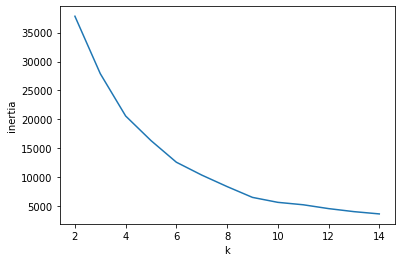

In [17]:
sns.lineplot(x='k', y='inertia', data=df_results)

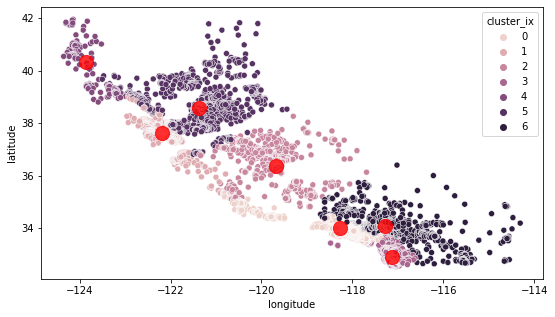

In [18]:
kmeans = KMeans(n_clusters=7)
y_pred = kmeans.fit_predict(X)

df_lat_long_cluster = pd.concat([X, pd.Series(y_pred)], axis=1).rename(columns={0: 'cluster_ix'})

plt.figure(figsize=(9,5))
centers = kmeans.cluster_centers_
sns.scatterplot( x='longitude', y='latitude', data=df_lat_long_cluster, hue='cluster_ix')
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.8)

In [19]:
from sklearn.metrics import silhouette_score

silhouette_score(X, kmeans.labels_)

0.6075153715312395

In [20]:
n_clusters = range(2, 15, 1)

df_results = pd.DataFrame(columns=['k', 'silhouette_score'])

for k in n_clusters:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    df_results = df_results.append({
        'k': k,
        'silhouette_score': silhouette_score(X, kmeans.labels_),
    }, ignore_index=True)
    
df_results

k  silhouette_score
0    2.0          0.698191
1    3.0          0.622516
2    4.0          0.560198
3    5.0          0.581954
4    6.0          0.592313
5    7.0          0.607515
6    8.0          0.634587
7    9.0          0.647458
8   10.0          0.647885
9   11.0          0.637419
10  12.0          0.650627
11  13.0          0.662172
12  14.0          0.656117

<AxesSubplot:xlabel='k', ylabel='silhouette_score'>

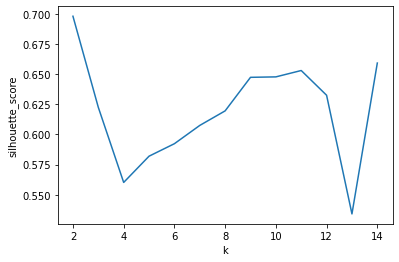

In [21]:
sns.lineplot(x='k', y='silhouette_score', data=df_results)

In [21]:
from sklearn.cluster import AgglomerativeClustering

agglo_clust = AgglomerativeClustering(n_clusters=5)
y_pred = agglo_clust.fit_predict(X)

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

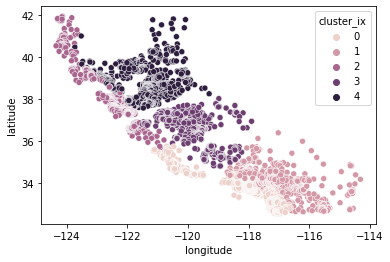

In [22]:
df_lat_long_cluster = pd.concat([X, pd.Series(y_pred)], axis=1).rename(columns={0: 'cluster_ix'})
sns.scatterplot( x='longitude', y='latitude', data=df_lat_long_cluster, hue='cluster_ix')

In [23]:
agglo_clust = AgglomerativeClustering(n_clusters=None, distance_threshold=10)
y_pred = agglo_clust.fit_predict(X)

In [24]:
from sklearn.cluster import DBSCAN

dbscan_clust = DBSCAN(eps=0.8, min_samples=8)
y_pred = dbscan_clust.fit_predict(X)

In [25]:
np.unique(y_pred)

array([-1,  0,  1,  2,  3,  4,  5], dtype=int64)

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

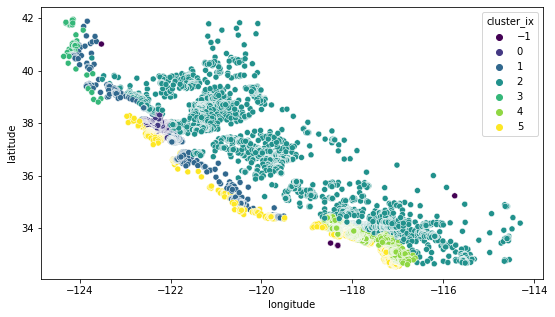

In [26]:
df_lat_long_cluster = pd.concat([X, pd.Series(y_pred)], axis=1).rename(columns={0: 'cluster_ix'})
plt.figure(figsize=(9,5))
sns.scatterplot( x='longitude', y='latitude', data=df_lat_long_cluster, hue='cluster_ix', palette='viridis')

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

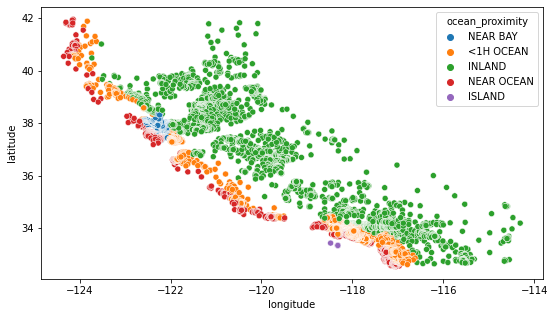

In [27]:
plt.figure(figsize=(9,5))
sns.scatterplot(y='latitude', x='longitude', data=df_housing_train, hue='ocean_proximity')

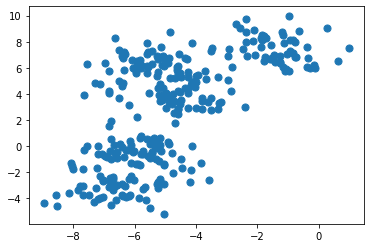

In [28]:
from sklearn.datasets import make_blobs

X, y_true = make_blobs(n_samples=300, centers=5,
                       cluster_std=0.90, random_state=22)

plt.scatter(X[:, 0], X[:, 1], s=50);

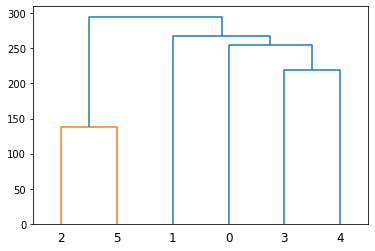

In [29]:
from scipy.cluster import hierarchy

ytdist = np.array([662., 877., 255., 412., 996., 295., 468., 268.,

                   400., 754., 564., 138., 219., 869., 669.])

Z = hierarchy.linkage(ytdist, 'single')

plt.figure()

dn = hierarchy.dendrogram(Z)

In [31]:
df_housing_train.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY

In [138]:
used_cols = ['housing_median_age', 'total_rooms', 'total_bedrooms', 'median_house_value', 'population', 'households', 'median_income']

X_used = df_housing_train[used_cols]
X_test = df_housing_test[used_cols]
# X_used.head()

In [139]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_used = scaler.fit_transform(X_used)
X_test = scaler.transform(X_test)

In [140]:
from sklearn.metrics import silhouette_score

n_clusters = range(2, 15, 1)
df_results = pd.DataFrame(columns=['k', 'inertia', 'score'])

for k in n_clusters:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X_used)
    df_results = df_results.append({
        'k': k,
        'inertia': kmeans.inertia_,
        'score': silhouette_score(X_used, kmeans.labels_)
    }, ignore_index=True)
    
df_results

k      inertia     score
0    2.0  1835.393821  0.301699
1    3.0  1219.494323  0.344033
2    4.0  1033.966690  0.326895
3    5.0   912.602798  0.266428
4    6.0   814.555010  0.266774
5    7.0   736.448986  0.274563
6    8.0   666.809822  0.270643
7    9.0   620.238482  0.256662
8   10.0   580.974915  0.258200
9   11.0   547.777928  0.255991
10  12.0   517.217706  0.244034
11  13.0   490.242356  0.242987
12  14.0   468.237602  0.241929

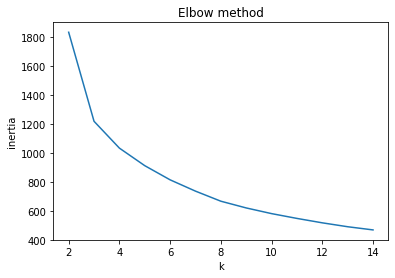

In [141]:
sns.lineplot(x='k', y='inertia', data=df_results)
plt.title('Elbow method')
plt.show()

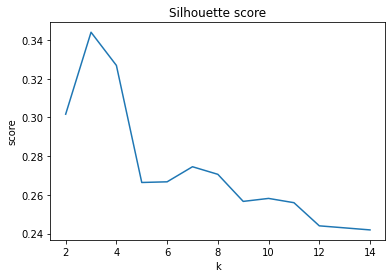

In [142]:
sns.lineplot(x='k', y='score', data=df_results)
plt.title('Silhouette score')
plt.show()

Try to pick 3 as the optimal number of clusters.

In [143]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(X_used)

KMeans(n_clusters=3)

In [144]:
# X_used['cluster_ix'] = kmeans.labels_
X_used_clustered = np.concatenate([X_used, kmeans.labels_.reshape(-1,1)], axis=1)

In [145]:
df_used = pd.DataFrame(X_used_clustered, columns=used_cols + ['cluster_ix'])
df_used['cluster_ix'] = df_used['cluster_ix'].apply(lambda x: str(x))

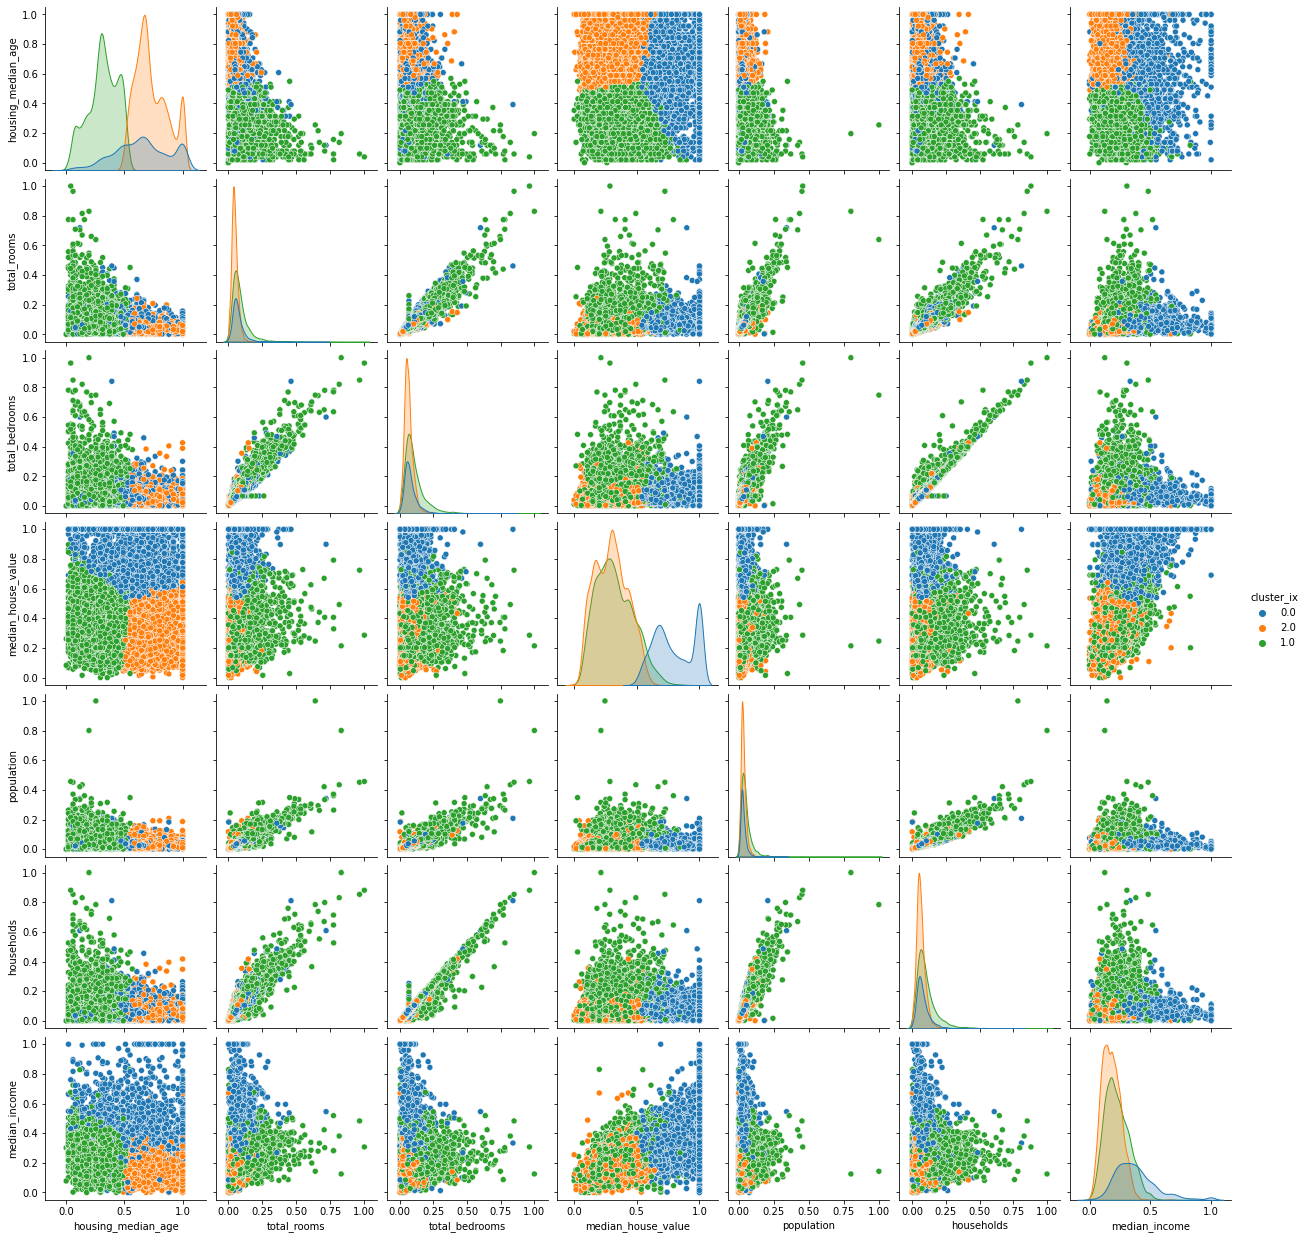

In [146]:
sns.pairplot(df_used, hue='cluster_ix')

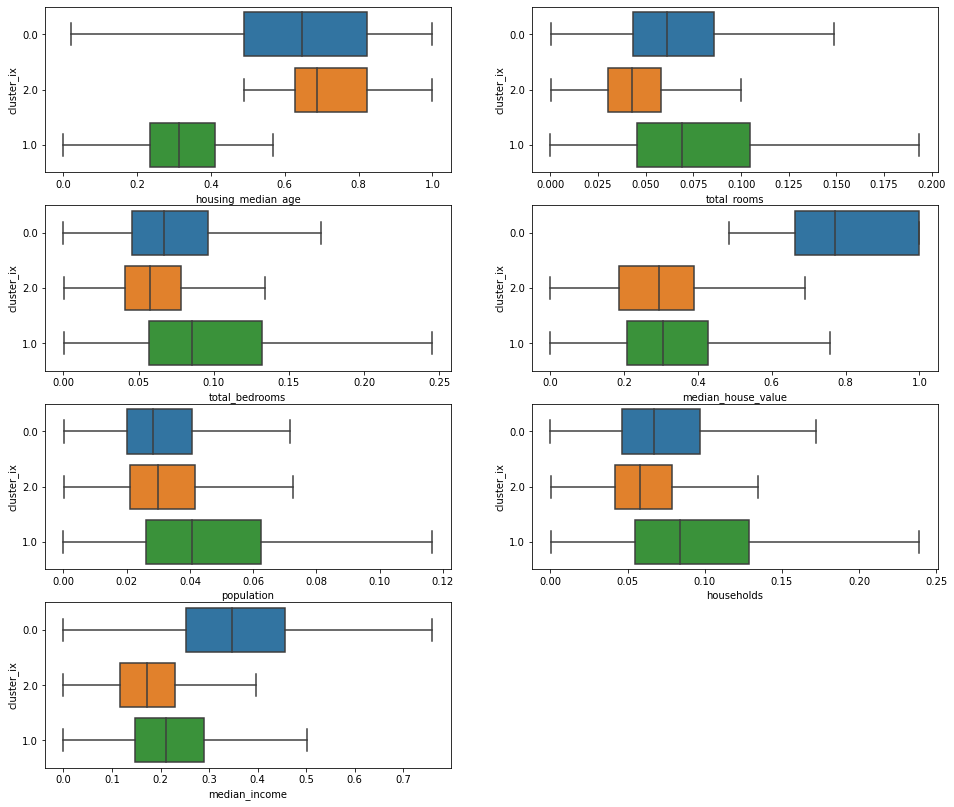

In [147]:
fig, ax = plt.subplots(4,2, figsize=(16,14))
ax[3][1].remove()
for ix, col in enumerate(used_cols):
    sns.boxplot(x=col, y='cluster_ix', data=df_used, ax=ax.flatten()[ix], showfliers=False)

Cluster 0: 
- old age
- mid total rooms
- mid total bedrooms
- expensive
- mid population
- mid households
- high median income

Cluster 2: 
- old age
- low total rooms
- low total bedrooms
- cheap
- mid population
- low households
- low median income

Cluster 1:
- new house
- mid total rooms
- mid total bedrooms
- cheap
- high population
- high households
- mid median income

In [148]:
kmeans.predict(X_test)

array([1, 0, 0, ..., 1, 1, 1])

In [152]:
X_test_clustered = np.concatenate([X_test, kmeans.predict(X_test).reshape(-1,1)], axis=1)

In [153]:
df_predicted = pd.DataFrame(X_test_clustered, columns=used_cols + ['cluster_ix'])
df_predicted['cluster_ix'] = df_predicted['cluster_ix'].apply(lambda x: str(x))

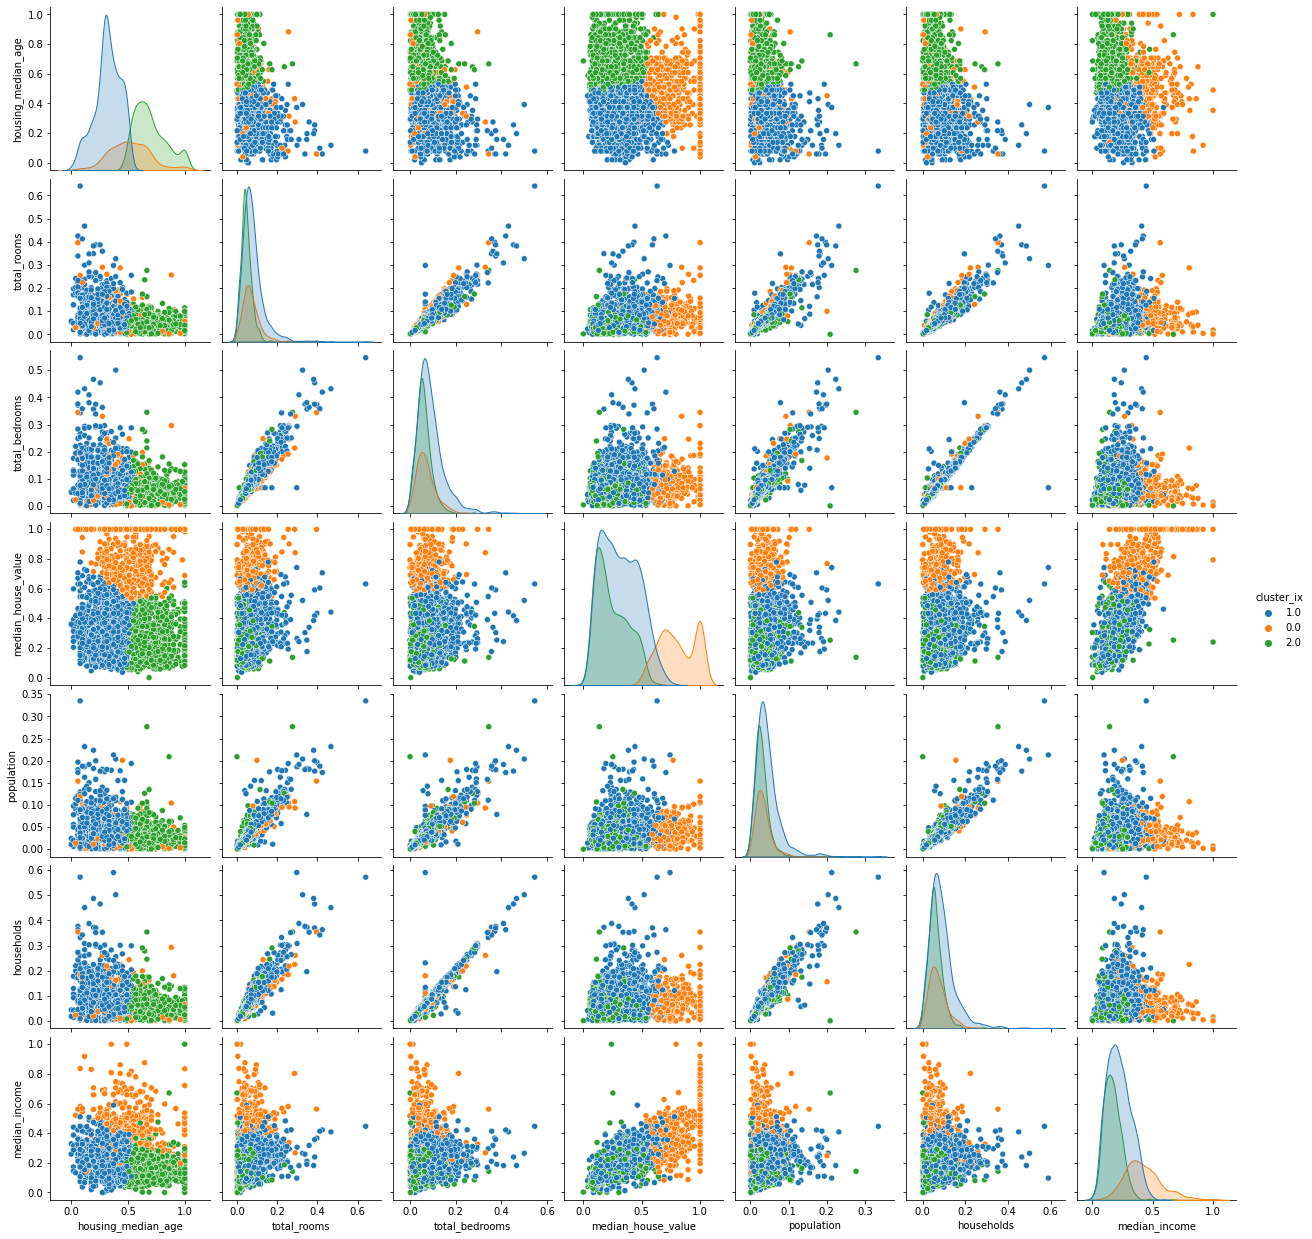

In [154]:
sns.pairplot(df_predicted, hue='cluster_ix')

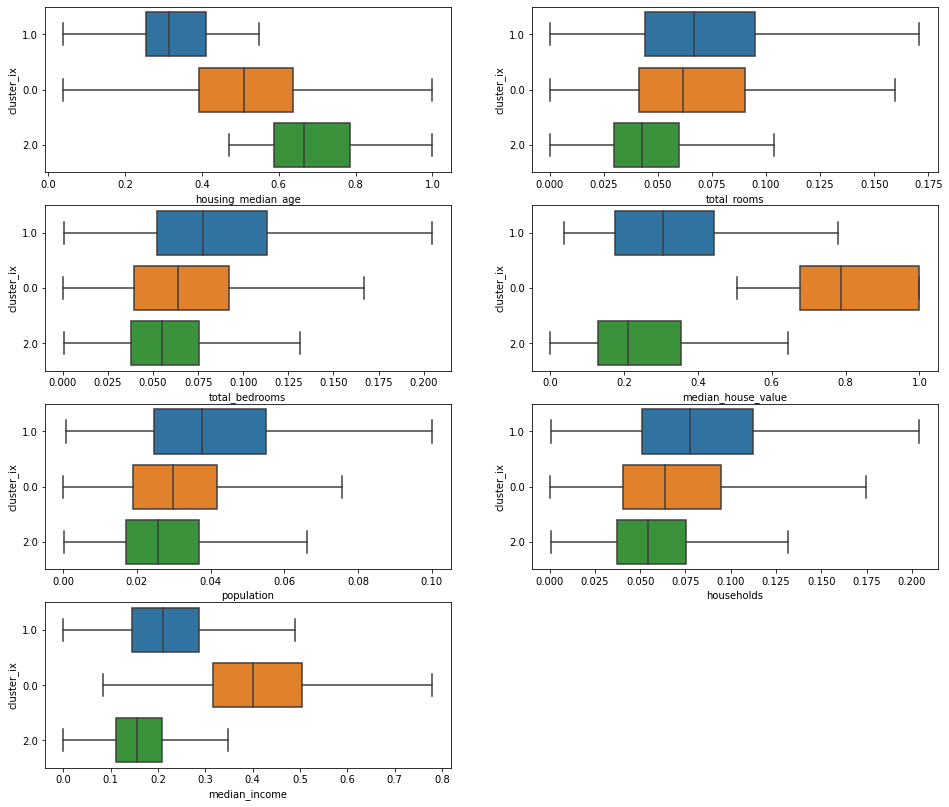

In [155]:
fig, ax = plt.subplots(4,2, figsize=(16,14))
ax[3][1].remove()
for ix, col in enumerate(used_cols):
    sns.boxplot(x=col, y='cluster_ix', data=df_predicted, ax=ax.flatten()[ix], showfliers=False)

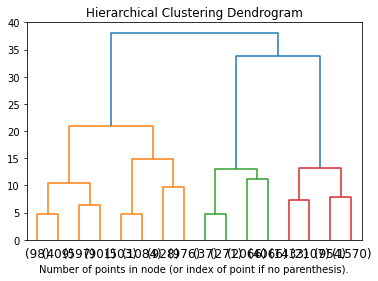

In [110]:
import numpy as np

from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram
from sklearn.datasets import load_iris
from sklearn.cluster import AgglomerativeClustering


def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_,
                                      counts]).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

# setting distance_threshold=0 ensures we compute the full tree.
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None)

model = model.fit(X_used)
plt.title('Hierarchical Clustering Dendrogram')
# plot the top three levels of the dendrogram
plot_dendrogram(model, truncate_mode='level', p=3)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.axhline(150, ls='--', color='black')
plt.show()

## Mall Customers Dataset

In [31]:
df_mall = pd.read_csv('Mall_Customers.csv')

In [32]:
df_mall.head()

CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40

In [33]:
len(df_mall)

200

In [34]:
df_mall_train = df_mall[:170]
df_mall_test = df_mall[170:]

<AxesSubplot:>

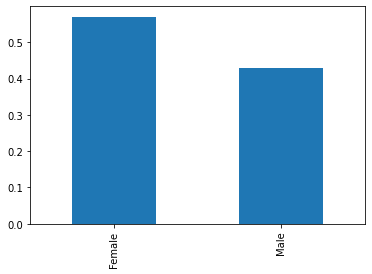

In [35]:
df_mall_train['Gender'].value_counts(normalize=True).plot(kind='bar')

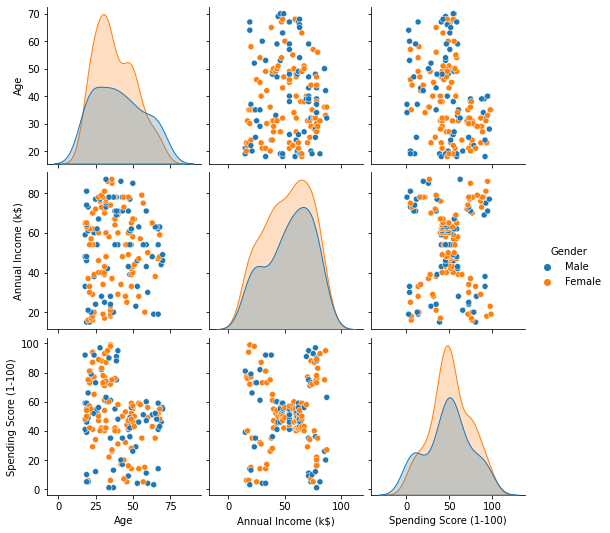

In [36]:
sns.pairplot(df_mall_train[['Age', 'Annual Income (k$)', 'Spending Score (1-100)', 'Gender']], hue='Gender')

In [37]:
X = df_mall_train[['Annual Income (k$)', 'Spending Score (1-100)']].copy()

kmeans = KMeans(n_clusters=5)
kmeans.fit(X)

KMeans(n_clusters=5)

In [38]:
X['cluster_ix'] = pd.Series(kmeans.labels_)
X

Annual Income (k$)  Spending Score (1-100)  cluster_ix
0                    15                      39           4
1                    15                      81           0
2                    16                       6           4
3                    16                      77           0
4                    17                      40           4
..                  ...                     ...         ...
165                  85                      75           3
166                  86                      20           1
167                  86                      95           3
168                  87                      27           1
169                  87                      63           3

[170 rows x 3 columns]

<AxesSubplot:xlabel='Spending Score (1-100)', ylabel='Annual Income (k$)'>

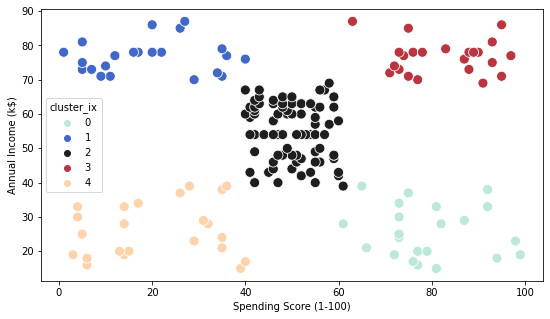

In [39]:
plt.figure(figsize=(9,5))
sns.scatterplot(x='Spending Score (1-100)', y='Annual Income (k$)', data=X, hue='cluster_ix', palette='icefire', s=100)

    Cluster 1: Mid income, mid spending
    Cluster 2: High income, high spending
    Cluster 3: Low income, low spending
    Cluster 4: High income, low spending
    Cluster 5: Low income, high spending

In [40]:
# fig, ax = plt.subplots(3,2,figsize=(15,15))
# ax[2, 1].remove()
# for ix in X['cluster_ix'].unique():
#     sns.boxplot(x=X[X['cluster_ix'] == ix]['Spending Score (1-100)'], ax=ax.flatten()[ix])
#     ax.flatten()[ix].title.set_text('Cluster {}'.format(ix))

In [41]:
import warnings

warnings.filterwarnings('ignore')

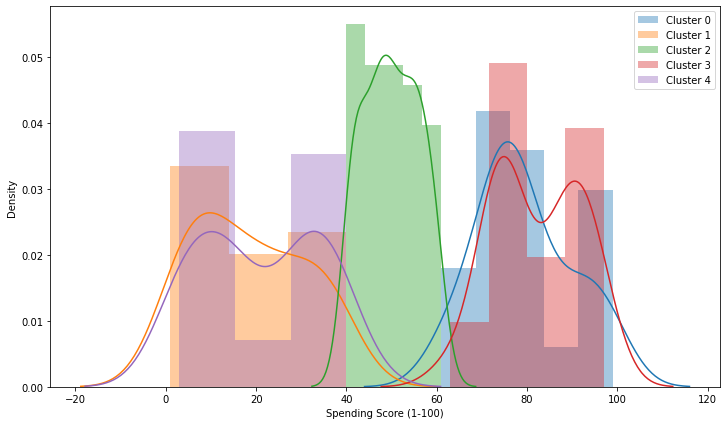

In [42]:
fig, ax = plt.subplots(figsize=(12,7))
for ix in sorted(X['cluster_ix'].unique()):
    sns.distplot(X[X['cluster_ix'] == ix]['Spending Score (1-100)'], label='Cluster {}'.format(ix))
plt.legend();

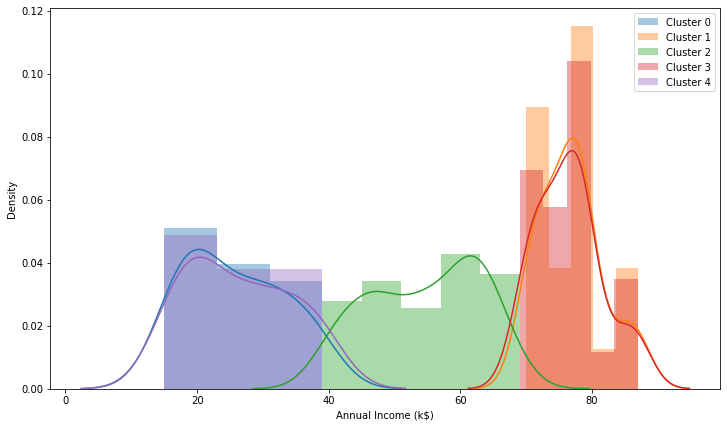

In [43]:
fig, ax = plt.subplots(figsize=(12,7))
for ix in sorted(X['cluster_ix'].unique()):
    sns.distplot(X[X['cluster_ix'] == ix]['Annual Income (k$)'], label='Cluster {}'.format(ix))
plt.legend();

In [44]:
cluster_names = {
    1: 'Mid income, mid spending',
    2: 'High income, high spending',
    3: 'Low income, low spending',
    4: 'High income, low spending',
    5: 'Low income, high spending',
}

df_mall_train['cluster_ix'] = pd.Series(kmeans.labels_ + 1)
df_mall_train['cluster'] = df_mall_train['cluster_ix'].apply(lambda x: cluster_names[x])

In [45]:
df_mall_train.head()

CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)  \
0           1    Male   19                  15                      39   
1           2    Male   21                  15                      81   
2           3  Female   20                  16                       6   
3           4  Female   23                  16                      77   
4           5  Female   31                  17                      40   

   cluster_ix                    cluster  
0           5  Low income, high spending  
1           1   Mid income, mid spending  
2           5  Low income, high spending  
3           1   Mid income, mid spending  
4           5  Low income, high spending

    Cluster 1: Mid income, mid spending
    Cluster 2: High income, high spending
    Cluster 3: Low income, low spending
    Cluster 4: High income, low spending
    Cluster 5: Low income, high spending

<AxesSubplot:xlabel='cluster_ix', ylabel='count'>

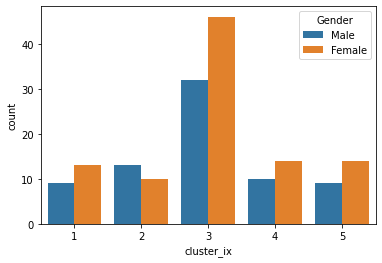

In [46]:
sns.countplot(x='cluster_ix', hue='Gender', data=df_mall_train)

There are more male customers in 4th cluster (high income, low spending).

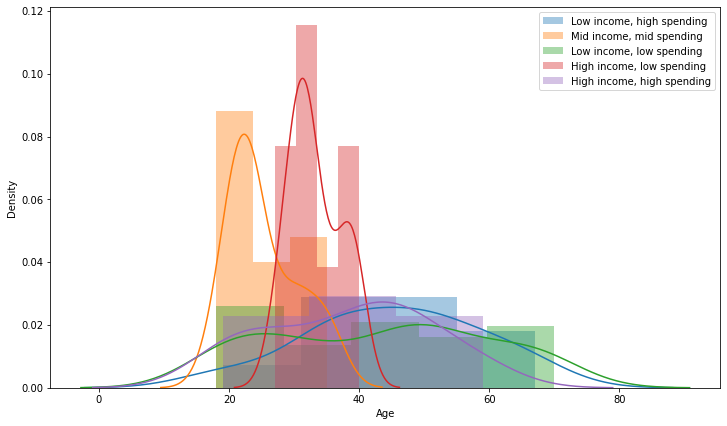

In [47]:
fig, ax = plt.subplots(figsize=(12,7))
for clust_ in df_mall_train['cluster'].unique():
    sns.distplot(df_mall_train[df_mall_train['cluster'] == clust_]['Age'], label=clust_)
plt.legend();

- Most customers with low income and high spending are youngsters (around 20s).
- Most customers with high income and high spending are middle-aged people (around 30s).

<AxesSubplot:xlabel='Spending Score (1-100)', ylabel='Annual Income (k$)'>

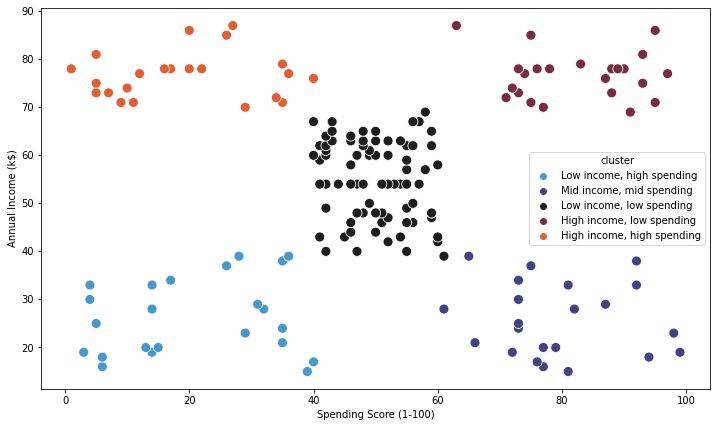

In [48]:
plt.figure(figsize=(12,7))
sns.scatterplot(x='Spending Score (1-100)', y='Annual Income (k$)', data=df_mall_train, hue='cluster', palette='icefire', s=100)

In [49]:
n_clusters = range(2, 11, 1)

df_results = pd.DataFrame(columns=['k', 'inertia', 'score'])

X = df_mall_train[['Annual Income (k$)', 'Spending Score (1-100)']]

for k in n_clusters:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    df_results = df_results.append({
        'k': k,
        'inertia': kmeans.inertia_,
        'score': kmeans.score(X)
    }, ignore_index=True)
    
df_results

k        inertia          score
0   2.0  107790.539414 -107790.539414
1   3.0   78629.102515  -78629.102515
2   4.0   49608.180210  -49608.180210
3   5.0   23492.535092  -23492.535092
4   6.0   18454.639315  -18454.639315
5   7.0   15285.313034  -15285.313034
6   8.0   13193.619131  -13193.619131
7   9.0   11320.868332  -11320.868332
8  10.0    9792.317966   -9792.317966

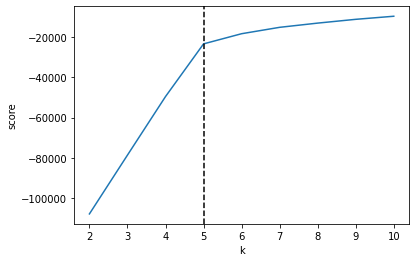

In [50]:
sns.lineplot(x='k', y='score', data=df_results)
plt.axvline(5, ls='--', color='black')

In [51]:
n_clusters = range(2, 11, 1)

df_results = pd.DataFrame(columns=['k', 'silhouette_score'])

for k in n_clusters:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    df_results = df_results.append({
        'k': k,
        'silhouette_score': silhouette_score(X, kmeans.labels_),
    }, ignore_index=True)
    
df_results

k  silhouette_score
0   2.0          0.339407
1   3.0          0.412868
2   4.0          0.489255
3   5.0          0.577099
4   6.0          0.487475
5   7.0          0.488439
6   8.0          0.482276
7   9.0          0.479274
8  10.0          0.465810

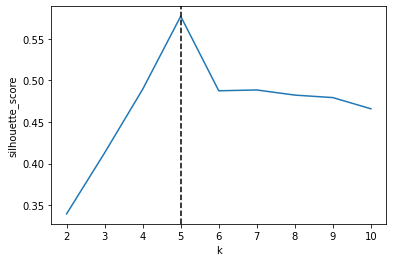

In [52]:
sns.lineplot(x='k', y='silhouette_score', data=df_results)
plt.axvline(5, ls='--', color='black')

In [53]:
X_all = df_mall_train[['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']].copy()
X_all['Gender'] = X_all['Gender'].apply(lambda x: 1 if x == 'Male' else 0)

In [54]:
n_clusters = range(2, 11, 1)

df_results = pd.DataFrame(columns=['k', 'inertia', 'score'])

for k in n_clusters:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X_all)
    df_results = df_results.append({
        'k': k,
        'inertia': kmeans.inertia_,
        'score': kmeans.score(X_all)
    }, ignore_index=True)
    
df_results

k        inertia          score
0   2.0  135814.365906 -135814.365906
1   3.0  107067.382360 -107067.382360
2   4.0   78685.551077  -78685.551077
3   5.0   54816.610112  -54816.610112
4   6.0   36267.528535  -36267.528535
5   7.0   32533.615043  -32533.615043
6   8.0   29759.345792  -29759.345792
7   9.0   26864.597120  -26864.597120
8  10.0   24250.193695  -24250.193695

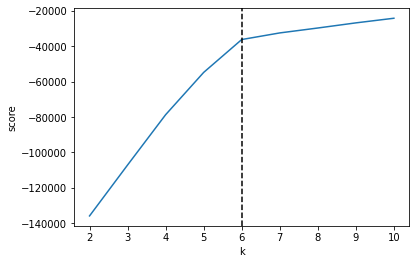

In [55]:
sns.lineplot(x='k', y='score', data=df_results)
plt.axvline(6, ls='--', color='black')

In [56]:
n_clusters = range(2, 11, 1)

df_results = pd.DataFrame(columns=['k', 'silhouette_score'])

for k in n_clusters:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X_all)
    df_results = df_results.append({
        'k': k,
        'silhouette_score': silhouette_score(X_all, kmeans.labels_),
    }, ignore_index=True)
    
df_results

k  silhouette_score
0   2.0          0.303898
1   3.0          0.307235
2   4.0          0.386157
3   5.0          0.437297
4   6.0          0.468640
5   7.0          0.420251
6   8.0          0.413305
7   9.0          0.396541
8  10.0          0.370039

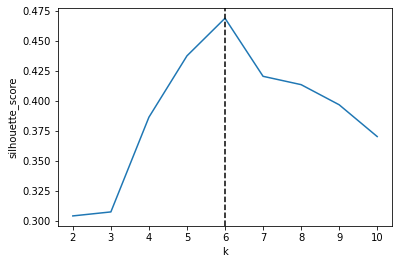

In [57]:
sns.lineplot(x='k', y='silhouette_score', data=df_results)
plt.axvline(6, ls='--', color='black')

In [58]:
agglo_clust  = AgglomerativeClustering(n_clusters=5)
agglo_clust.fit(X)

AgglomerativeClustering(n_clusters=5)

In [59]:
X_agglo = X.copy()
X_agglo['cluster_ix'] = agglo_clust.labels_

<AxesSubplot:xlabel='Spending Score (1-100)', ylabel='Annual Income (k$)'>

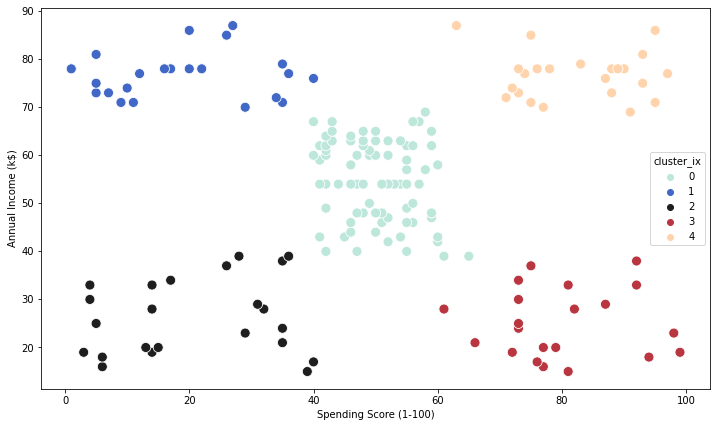

In [60]:
plt.figure(figsize=(12,7))
sns.scatterplot(x='Spending Score (1-100)', y='Annual Income (k$)', data=X_agglo, hue='cluster_ix', palette='icefire', s=100)

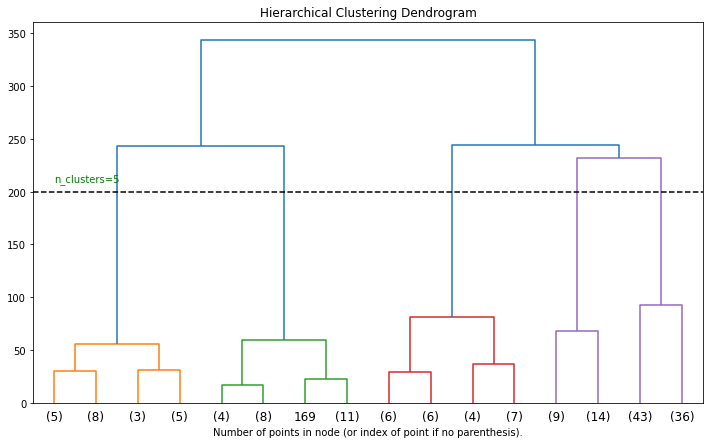

In [67]:
from scipy.cluster.hierarchy import dendrogram

def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_,
                                      counts]).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

# setting distance_threshold=0 ensures we compute the full tree.
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None)

model = model.fit(X)
plt.figure(figsize=(12,7))
plt.title('Hierarchical Clustering Dendrogram')
# plot the top three levels of the dendrogram
plot_dendrogram(model, truncate_mode='level', p=3)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.axhline(200, ls='--', color='black')
plt.annotate('n_clusters=5', xy=(5, 210), color='green')
plt.show()

<AxesSubplot:xlabel='Spending Score (1-100)', ylabel='Annual Income (k$)'>

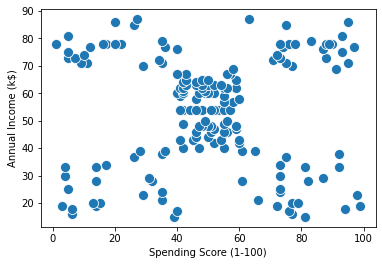

In [62]:
sns.scatterplot(x='Spending Score (1-100)', y='Annual Income (k$)', data=X, palette='icefire', s=100)

In [63]:
dbscan = DBSCAN(eps=4.5, min_samples=5)
dbscan.fit(X)

DBSCAN(eps=4.5)

In [64]:
dbscan.core_sample_indices_

array([  3,   5,  50,  52,  54,  56,  57,  58,  59,  60,  61,  62,  63,
        64,  65,  66,  67,  68,  69,  70,  72,  73,  74,  75,  76,  77,
        78,  80,  81,  83,  84,  85,  86,  87,  89,  90,  91,  92,  93,
        94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104, 105, 106,
       107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 120,
       129, 130, 131, 133, 136, 137, 138, 139, 143, 147, 149])

In [65]:
dbscan.labels_

array([-1,  0, -1,  0, -1,  0, -1, -1, -1,  0, -1, -1, -1,  0, -1,  0, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1,  1,  1,  1,  1,
       -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1, -1, -1,  2, -1, -1,  3,  2,  3,  2, -1,  2,  3,  4,
        3,  2,  3,  2,  3,  4, -1,  4,  3, -1, -1,  2, -1,  4, -1,  4, -1,
        2, -1,  4, -1,  2, -1,  2, -1, -1, -1,  4, -1, -1, -1, -1, -1, -1])

<AxesSubplot:xlabel='Spending Score (1-100)', ylabel='Annual Income (k$)'>

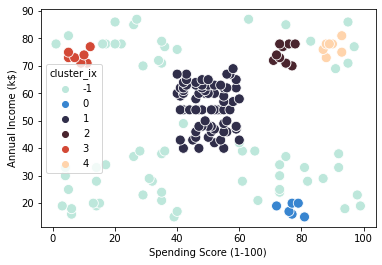

In [66]:
X_dbscan = X.copy()
X_dbscan['cluster_ix'] = dbscan.labels_
sns.scatterplot(x='Spending Score (1-100)',
                y='Annual Income (k$)',
                data=X_dbscan,
                hue='cluster_ix',
                palette='icefire', s=100)